/tmp/ipykernel_20801/2859554536.py:114: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  csf1 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a1[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
/tmp/ipykernel_20801/2859554536.py:123: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  csf2 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a2[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
/tmp/ipykernel_20801/2859554536.py:131: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to i

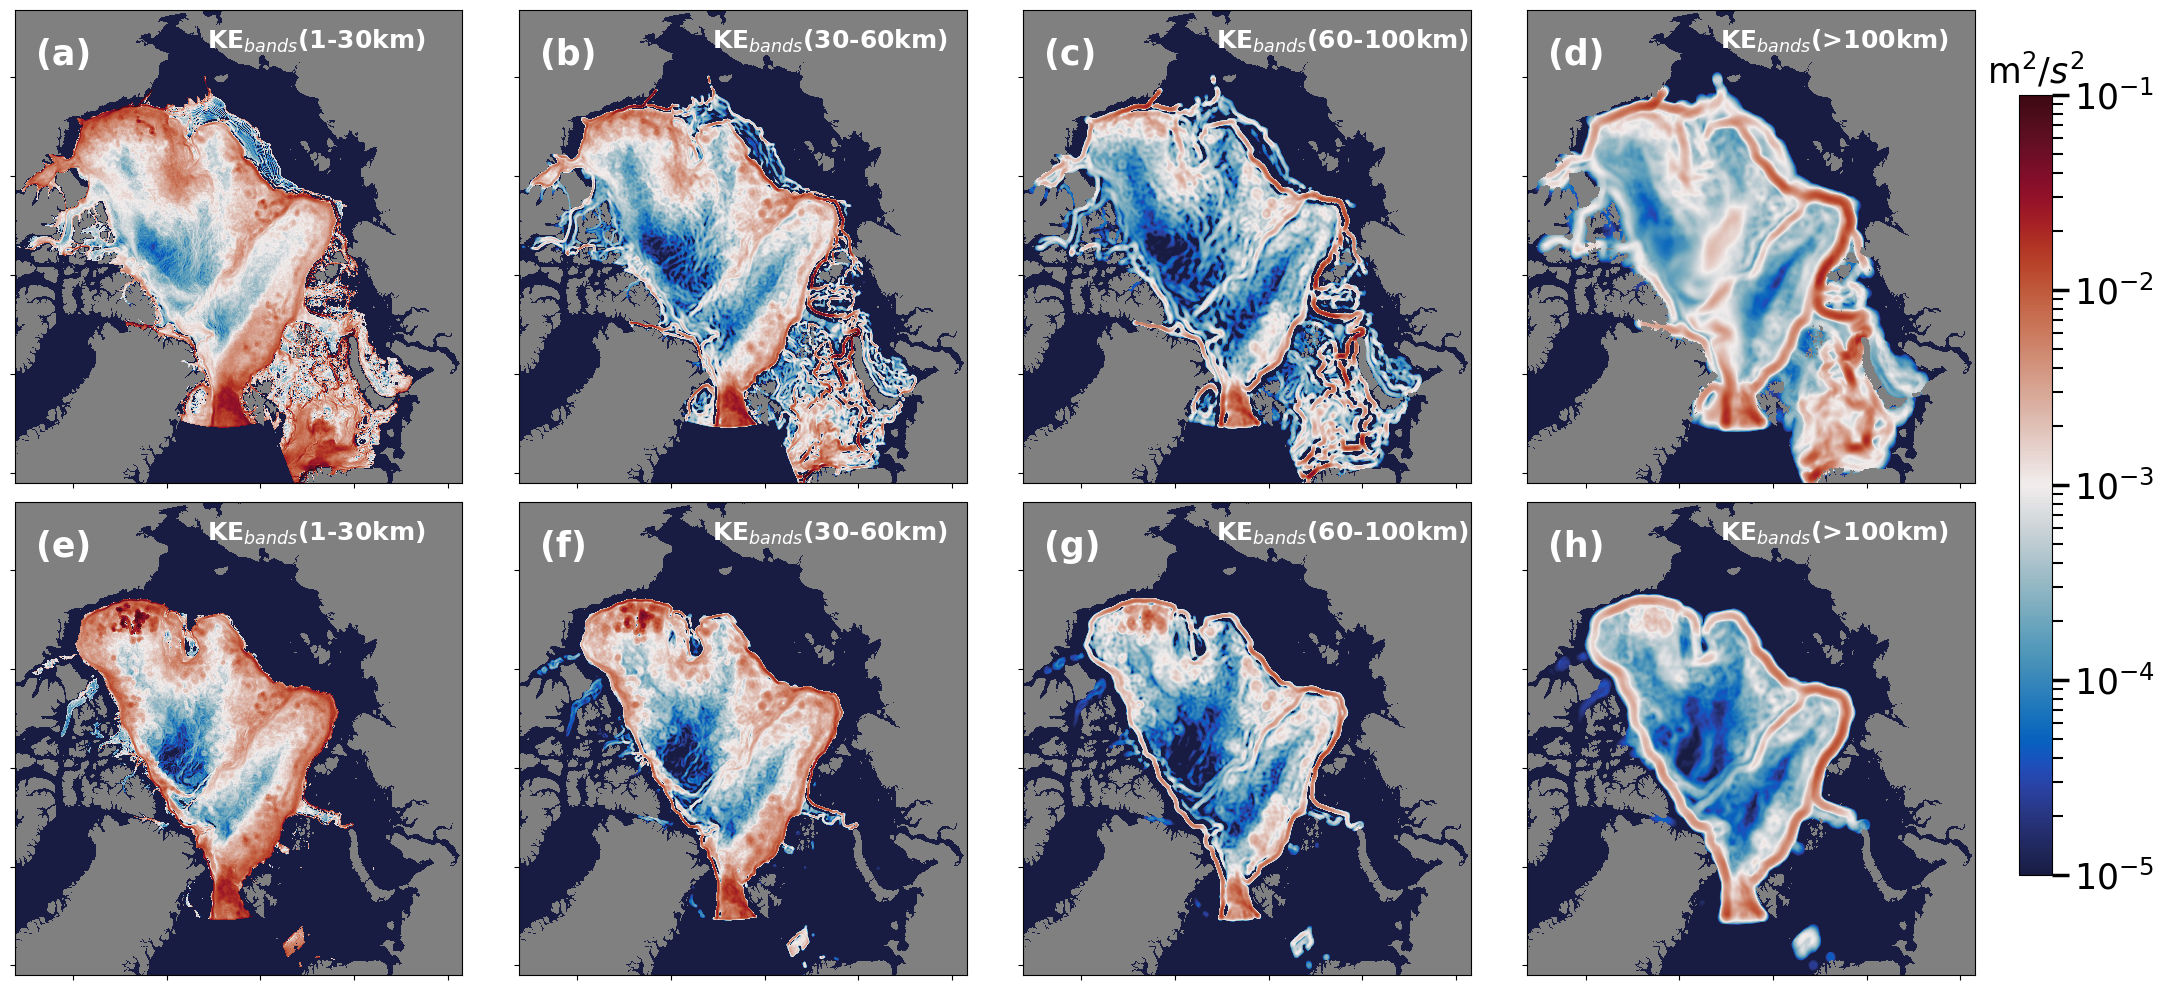

1


In [1]:
### from matplotlib.ticker import LogLocator
from matplotlib.colors import LogNorm
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import numpy.ma as ma
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import sys
import gc
import datetime
import os
import cmocean
from netCDF4 import Dataset, MFDataset, num2date
import xarray as xr
import scipy.io

mesh_path='mesh/'
mask = np.load((mesh_path+'mask_AO_cartesian.npy'))
mask1=mask
xx_pol = np.load((mesh_path+'xx_pol.npy'))
yy_pol = np.load((mesh_path+'yy_pol.npy'))
# ----boundary of lat&lon for selected areas
left = -180 #longitude 1
right = 180 #longitude 2
bottom = 65 #latitude 1
top = 90 #latitude 2
region = (yy_pol>=bottom)&(yy_pol<=top)&(xx_pol>=left)&(xx_pol<=right)
mask[~region]=True

mask1 = np.load((mesh_path+'mask_AO_cartesian.npy'))
mask1[~region]=True
region_1 = (yy_pol>=65)&(yy_pol<=80)&(xx_pol>=-100)&(xx_pol<=-45)
region_2 = (yy_pol>=65)&(yy_pol<=77)&(xx_pol>=-45)&(xx_pol<=20)
mask1[region_1]=True
mask1[region_2]=True
 
# Initiate Basemap instance and do standard convertion of coordinates
data = scipy.io.loadmat('fig1_x_y_for_grid_gradient.mat') # load data from .mat
x=data['x']
y=data['y']
 
i = 0

# np.save("/p/scratch/chhb19/liu27/post_process_scripts/Fig5_plus/store/coarse_vor_00_390m_60km_100km.npy", coarse_vor_00)
a1_1 = np.load("coarse_vor_00_70mbands_1_30km.npy")
a2_1 = np.load("coarse_vor_00_70mbands_30_60km.npy")
a3_1 = np.load("coarse_vor_00_70mbands_60_100km.npy")
a4_1 = np.load("coarse_vor_00_70m_100km.npy")

b1_1 = np.load("coarse_vor_00_390mbands_1_30km.npy")
b2_1 = np.load("coarse_vor_00_390mbands_30_60km.npy")
b3_1 = np.load("coarse_vor_00_390mbands_60_100km.npy")
b4_1 = np.load("coarse_vor_00_390m_100km.npy")

coarse_vor_1 = a1_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
a1 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = a2_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
a2 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = a3_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
a3 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = a4_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
a4 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = b1_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
b1 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = b2_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
b2 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = b3_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
b3 = ma.masked_invalid(coarse_vor_1)/1025

coarse_vor_1 = b4_1.T #- coarse_vor_01.T #*8#*1e-3*1e-3
coarse_vor_1[np.where(abs(coarse_vor_1)>1e6)] = 1e-2
coarse_vor_1[mask] = np.nan
b4 = ma.masked_invalid(coarse_vor_1)/1025

for help_1 in range(1):
    for help_2 in range(1):
        fig = plt.figure(figsize=(22,10)) 
        
        levels = np.linspace(-1,2,30)
        #cmap_b = cmocean.cm.amp
        #cmap_b = cmocean.cm.matter
        cmap_b = cmocean.cm.balance
        cmap_b.set_bad('gray',1)
        #cmap_b = cmocean.cm.thermal
        #cmap_b = cmocean.cm.amp
        cmap_b_mask = cmocean.cm.gray
        fcolor='gray' #'w'
        lcolor='gray'
        norm_L = matplotlib.colors.LogNorm(vmin=1e-5,vmax=1e-1)
        #fig, axs = plt.subplots(1,2,2,figsize=(15,10))
        ################### plot 1 ##########################
        ax = fig.add_subplot(2,4,1)
        csf1 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a1[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(a)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(1-30km)", fontsize=18, color='w',weight ='bold')

        
        ################### plot 2 ##########################
        ax = fig.add_subplot(2,4,2)
        csf2 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a2[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(b)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(30-60km)", fontsize=18, color='w',weight ='bold')
        
        ################### plot 3 ##########################
        ax = fig.add_subplot(2,4,3)
        csf3 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a3[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(c)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(60-100km)", fontsize=18, color='w',weight ='bold')
        
        ################### plot 4 ##########################
        ax = fig.add_subplot(2,4,4)
        csf4 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], a4[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(d)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(>100km)", fontsize=18, color='w',weight ='bold')        
        
        ################### plot 5 ##########################
        ax = fig.add_subplot(2,4,5)
        csf5 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], b1[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(e)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(1-30km)", fontsize=18, color='w',weight ='bold')

        
        ################### plot 6 ##########################
        ax = fig.add_subplot(2,4,6)
        csf6 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], b2[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(f)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(30-60km)", fontsize=18, color='w',weight ='bold')        
        
        ################### plot 7 ##########################
        ax = fig.add_subplot(2,4,7)
        csf7 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], b3[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(g)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(60-100km)", fontsize=18, color='w',weight ='bold')        
        
        ################### plot 8 ##########################
        ax = fig.add_subplot(2,4,8)
        csf8 = ax.pcolormesh(x[500:5000-200,700:], y[500:5000-200,700:], b4[500:5000-200,700:],cmap=cmap_b,norm=norm_L)
        ax.tick_params(labelbottom=False)
        ax.tick_params(labelleft=False)
        plt.text(x[200+500,0], y[0,5000-500], "(h)", fontsize=25, color='w',weight ='bold')
        plt.text(x[2500-650+500,0], y[0,5000-350], "KE$_{bands}$(>100km)", fontsize=18, color='w',weight ='bold')   

        
        plt.tight_layout()
        fig.subplots_adjust(right=0.9, wspace=None, hspace=None)
        position = fig.add_axes([0.92, 0.12, 0.015, .78 ])
        cb = fig.colorbar(csf2, cax=position)
        #
        colorbarfontdict = {"size":25,"color":"k",'family':'Times New Roman'}
        cb.ax.set_title('m$^{2}/s^{2}$',fontdict=colorbarfontdict,pad=8)
        cb.ax.tick_params(labelsize=25,direction='out',length=12,width=2.5)
        cb.ax.minorticks_on()
        cb.ax.tick_params(which='minor',labelsize=20,direction='out',length=8,width=1.5)        
#         plt.savefig(fname.format(str(i).zfill(5)), dpi = 200)
        i = i+1
        plt.show()
        # memory cleanup, otherwise you will occupy it all very soon
        plt.clf()
        plt.close()
        gc.collect()
        print(i)